<a href="https://colab.research.google.com/github/Utomi-Tom/Granular_Material_analysis/blob/main/Geomaterial_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
The dataset used for this project is sposnored by the BMBF. It contains measures from triaxial experiments of granular materials to select rheological scaled analgoue material. 

The prototype rocks are low porosity carbonate rocks interbeded with thin marl layers located in the malm formation within the portion of the German molasse basin.

The dataset contains geotechnical measurements performed on selected mixtures of sand and gypsum. 

The aim of the tests was to determine suitable material with rheology similar to outcrop prototype which happens to be the interbedded Carbonate and marl  Malm formation. 

Types of Materials


1.   Gypsum
2.   Sand

3.   Flour

## Geotechnical tests

**What Is Geotechnical Analysis**

Geotechnical analysis is executed by geologists to determine informations regarding the petro-physical characteristics of soil and rock. These parameters in Engineering sector- are used to design foundations for planned structures, in geoscience they are used for reservoir characterisation, rheological characterisations and in analogue modelling for scaling purposes. Data are minned from rock samples collected from varying depth locations of interest and accessibility.

**what tests where performed on the sample and why?**


**what do i hope to achieve from this project**
1. Observe and visualize relationships existing between measured parameters.
2. Determine new features from existing parameters such as Slip and Dilation tendency.
3. Create a machine learning model- using sklearn library, that predicts a selected target property.


**Problem statement**

Rock rheological classification from triaxial test. 



# Aim

We aim to create models that can classify rock rheology based on idetified fundamental parameters of triaxial test. 


# Implentation of tools 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn display settings
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context="paper",palette="husl", style="ticks", rc=custom_params)


# Load data

In [2]:
data = "/content/drive/MyDrive/Analoguematerial_/Material_test.csv"
dataset = pd.read_csv(data,)

## DATA QC AND QA

In [3]:
# Rename the parameters with undersandable names.
Cols = ["Material","Normal_stress_Pa","Shear_stress_Pa","Tensile_stress_Pa", "Cohesion_Pa", "UCS_Pa", "Sigma1_Pa", "Sigma2_Pa", 
        "Effective_Angle_Friction", "React_Angle_Friction", "Density_g/cm³", "Flowability"]

Dataset = dataset.set_axis(Cols, axis="columns")
Dataset.sample(frac= 0.2)

,Material,Normal_stress_Pa,Shear_stress_Pa,Tensile_stress_Pa,Cohesion_Pa,UCS_Pa,Sigma1_Pa,Sigma2_Pa,Effective_Angle_Friction,React_Angle_Friction,Density_g/cm³,Flowability
18,GP50-SN50,1106,910,348,292,983,2609,575,38.9,37.5,0.954,2.65
30,flour 100,1074,797,530,421,1200,2230,506,37.0,26.5,0.605,1.86
2,GP 100,587,552,226,193,662,1484,281,41.8,37.3,0.659,2.24
25,GP25-SN75,1620,1172,241,212,743,3674,953,35.9,31.6,1.187,4.95
27,flour 100,580,409,4,202,599,1226,286,37.0,28.2,0.568,2.05
13,GP75-SN25,1587,1275,452,422,1403,3686,827,38.5,37.4,0.864,2.63
12,GP75-SN25,1587,1243,318,445,1461,3658,817,38.5,35.7,0.862,2.50


In [ ]:
# Check for missing values
Dataset.isna().sum()

Material                    0
Normal_stress_Pa            0
Shear_stress_Pa             0
Tensile_stress_Pa           0
Cohesion_Pa                 0
UCS_Pa                      0
Sigma1_Pa                   0
Sigma2_Pa                   0
Effective_Angle_Friction    0
React_Angle_Friction        0
Density_g/cm³               0
Flowability                 0
dtype: int64

# Feature Engineering

In [4]:
# Create a column on the Dataset that qualifies material rheology based on Flowability and cohesion
import numpy as np

Dataset["Rheology"] = np.where(Dataset['Flowability'] < 3.0, "Cohesive", "Incohesive")


# The slip tendency (T,) of a surface is defined as the ratio of shear stress to normal stress on that surface:
Dataset["Slip_Tendency"] = Dataset["Shear_stress_Pa"] / Dataset["Normal_stress_Pa"]

Dataset.sample(7)


,Material,Normal_stress_Pa,Shear_stress_Pa,Tensile_stress_Pa,Cohesion_Pa,UCS_Pa,Sigma1_Pa,Sigma2_Pa,Effective_Angle_Friction,React_Angle_Friction,Density_g/cm³,Flowability,Rheology,Slip_Tendency
8,GP75-SN25,597,545,240,203,689,1501,283,41.7,37.6,0.779,2.18,Cohesive,0.912898
16,GP50-SN50,1106,889,347,345,1109,2533,552,38.8,35.4,0.949,2.28,Cohesive,0.803797
20,GP50-SN50,1598,1340,518,438,1483,3827,819,39.5,38.2,0.976,2.58,Cohesive,0.838548
13,GP75-SN25,1587,1275,452,422,1403,3686,827,38.5,37.4,0.864,2.63,Cohesive,0.803403
29,flour 100,1074,808,293,462,1289,2226,482,37.6,26.9,0.598,1.73,Cohesive,0.752328
9,GP75-SN25,599,501,81,224,718,1428,277,40.8,34.8,0.792,1.99,Cohesive,0.836394
27,flour 100,580,409,4,202,599,1226,286,37.0,28.2,0.568,2.05,Cohesive,0.705172


In [5]:
# Shuffle dataset and create independent variables and target column for training . 
Shuff =Dataset.sample(frac=1)
X = Shuff.drop(['Material',"Rheology"], axis = 1)
Y = Shuff["Rheology"]

In [6]:
# split dataset 
from sklearn.model_selection import train_test_split

x_tr, x_t, y_tr, y_t = train_test_split(X,Y,
                                        test_size=0.3, )

In [7]:
x_tr.shape,x_t.shape,y_tr.shape,y_t.shape

((24, 12), (11, 12), (24,), (11,))

## EXPLORATORY DATA ANALYSIS

Now that the dataset has been sorted into batches for training and testing. We would like to manipulate and visualize the training dataset for more knowledge discovery from data.

In [8]:
## General describption of train_data
x_tr.describe()

,Normal_stress_Pa,Shear_stress_Pa,Tensile_stress_Pa,Cohesion_Pa,UCS_Pa,Sigma1_Pa,Sigma2_Pa,Effective_Angle_Friction,React_Angle_Friction,Density_g/cm³,Flowability,Slip_Tendency
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,1034.291667,837.208333,272.000000,315.208333,1013.000000,2398.208333,517.958333,39.141667,34.466667,0.845375,2.442083,0.814561
std,391.641082,307.111505,135.997442,121.927626,374.148657,909.928090,215.242528,1.768054,4.111137,0.196315,0.755697,0.059574
min,580.000000,409.000000,4.000000,139.000000,449.000000,1226.000000,243.000000,35.500000,24.700000,0.568000,1.670000,0.705172
25%,612.000000,518.000000,162.500000,206.750000,710.750000,1486.500000,298.500000,38.250000,31.850000,0.665750,2.065000,0.777138
50%,1087.500000,872.500000,274.000000,309.000000,1018.500000,2496.000000,521.500000,38.800000,34.950000,0.847000,2.250000,0.807205
75%,1238.750000,1062.250000,383.750000,423.000000,1296.500000,2961.750000,663.000000,40.700000,37.525000,0.950250,2.600000,0.852117
max,1619.000000,1356.000000,515.000000,550.000000,1727.000000,3866.000000,949.000000,42.800000,41.500000,1.181000,5.260000,0.940905


The above table gives an idea on the central tendency of each parameter, likewise individual spreads of each parameter. Their Minimum and Maximum of each parameter range. with a total of 24 training samples.

In [9]:
print("Number of column in dataset: ", len(x_tr.columns))

Number of column in dataset:  12


In [10]:
print("Names of Measured and derived parameters in dataset: ", pd.DataFrame(x_tr.columns,))

Names of Measured and derived parameters in dataset:                             0
0           Normal_stress_Pa
1            Shear_stress_Pa
2          Tensile_stress_Pa
3                Cohesion_Pa
4                     UCS_Pa
5                  Sigma1_Pa
6                  Sigma2_Pa
7   Effective_Angle_Friction
8       React_Angle_Friction
9              Density_g/cm³
10               Flowability
11             Slip_Tendency


**Univariate data analysis**

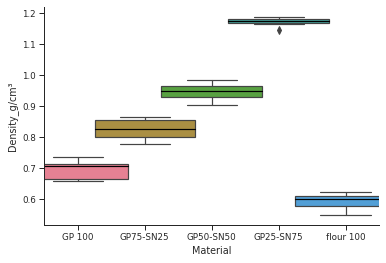

In [ ]:
sns.boxplot(x='Material',
            y='Density_g/cm³',
            data = Dataset, width=1.5, dodge=False, medianprops={"color": "black"});

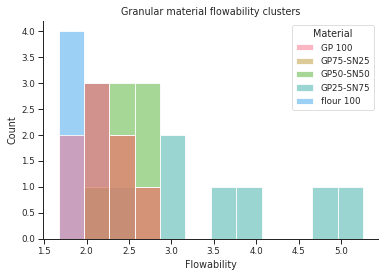

In [ ]:
# Here we visualize the probability density function of the material flowability. 
# **GP25_SN75 are more distributed and have more variance in the distribution**

sns.histplot(data=Dataset, x ='Flowability', hue="Material", )
plt.title("Granular material flowability clusters");

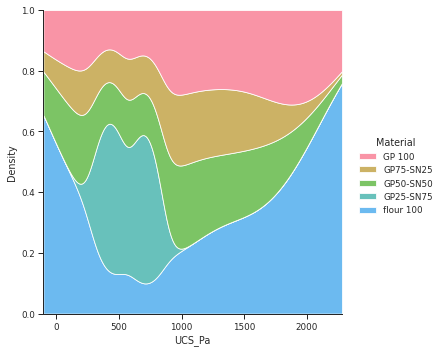

In [ ]:
# Here We visualise the Uniaxial compressive strength of the granular materials. 
# ??
sns.displot(data=Dataset, x= "UCS_Pa", hue="Material", multiple="fill",kind="kde");

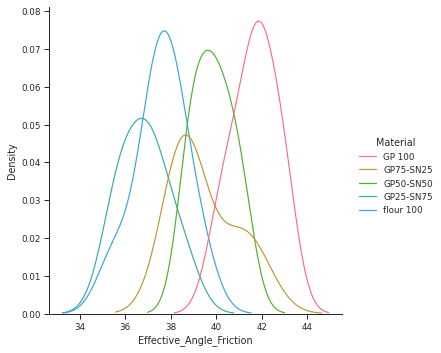

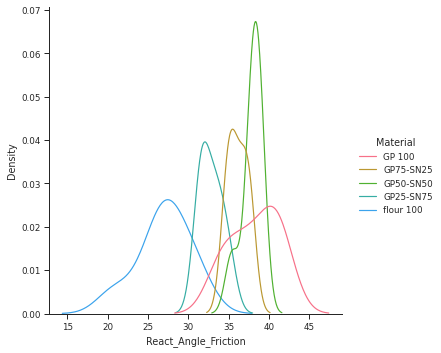

In [ ]:
# Define the distribution type each material effective angle of friction sampled data. 
sns.displot(data=Dataset, x='Effective_Angle_Friction', hue="Material",kind="kde");
sns.displot(data=Dataset, x ='React_Angle_Friction', hue="Material",kind="kde");

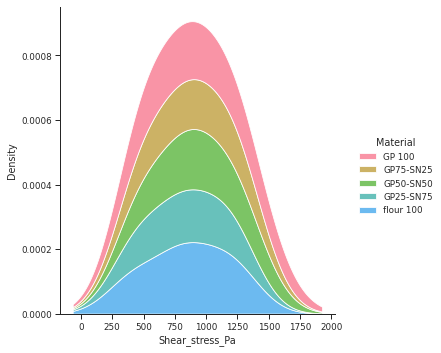

In [ ]:
# Define the distribution type each material Shear strength of sampled data. 
sns.displot(data=Dataset, x='Shear_stress_Pa', hue="Material", kind="kde",multiple="stack");

**Bivariate data analysis**

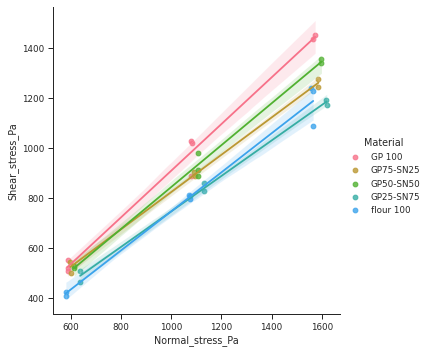

In [ ]:
# Here were show the shear strength of individual granular materials with increasing stress.
sns.lmplot(data=Dataset, x="Normal_stress_Pa", y="Shear_stress_Pa", hue="Material")

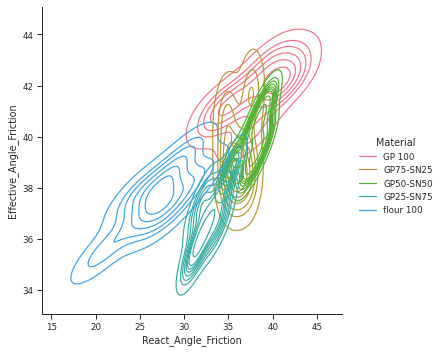

In [ ]:
# Frictional angle of the granular material
sns.displot(data=Dataset, x='React_Angle_Friction', y='Effective_Angle_Friction',  kind="kde", hue='Material' )

**Multivariate data analysis**

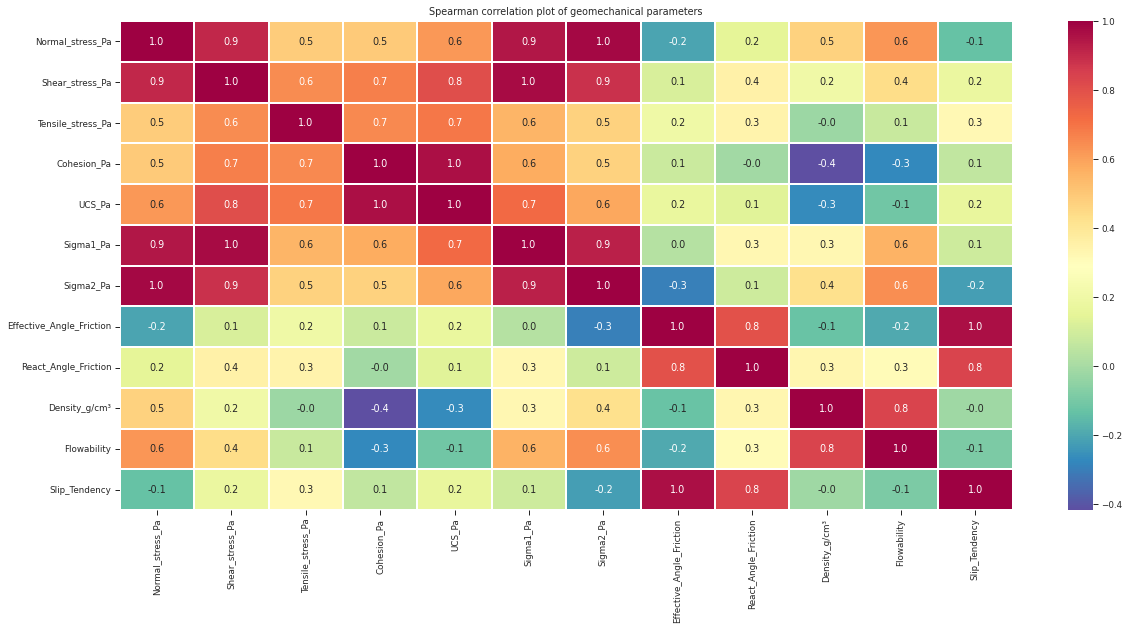

In [11]:
Corr_mat = Dataset.corr( method="spearman")

fig, ax = plt.subplots( figsize=(20,9) )

ax= sns.heatmap(data=Corr_mat, annot=True, cmap= 'Spectral_r', fmt=".1f", linewidths=1,  )
plt.title("Spearman correlation plot of geomechanical parameters", );

# Modelling


In [12]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [13]:
Model  = RFC()

In [14]:
Model.fit(x_tr,y_tr)

RandomForestClassifier()

In [15]:
y_pred = Model.predict(x_t)

In [16]:
Model.score(x_tr, y_tr)

1.0

In [18]:
Important_features= Model.feature_importances_

In [24]:
# Matching the features to their respective columns

Important_features= dict(zip(x_tr.columns, list(Important_features)))

In [25]:
Important_features

{'Normal_stress_Pa': 0.025564636773873488,
 'Shear_stress_Pa': 0.01457142857142857,
 'Tensile_stress_Pa': 0.051952705071961786,
 'Cohesion_Pa': 0.09519346073051736,
 'UCS_Pa': 0.09985024081464107,
 'Sigma1_Pa': 0.006727688787185355,
 'Sigma2_Pa': 0.03337189038294744,
 'Effective_Angle_Friction': 0.09552453123513556,
 'React_Angle_Friction': 0.0099343653250774,
 'Density_g/cm³': 0.20453307064452578,
 'Flowability': 0.30203814297648884,
 'Slip_Tendency': 0.06073783868621737}

In [27]:
visualize_feat = pd.DataFrame(Important_features, index=[0])

In [28]:
visualize_feat

,Normal_stress_Pa,Shear_stress_Pa,Tensile_stress_Pa,Cohesion_Pa,UCS_Pa,Sigma1_Pa,Sigma2_Pa,Effective_Angle_Friction,React_Angle_Friction,Density_g/cm³,Flowability,Slip_Tendency
0,0.025565,0.014571,0.051953,0.095193,0.09985,0.006728,0.033372,0.095525,0.009934,0.204533,0.302038,0.060738


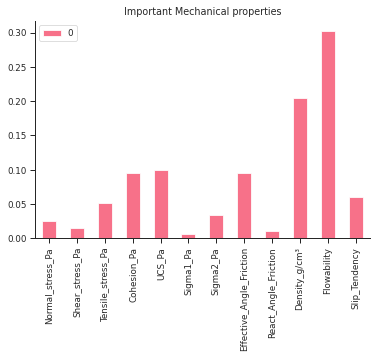

In [29]:
visualize_feat.T.plot.bar(title="Important Mechanical properties")